In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | lakes entrance
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | zhanakorgan
Processing Record 6 of Set 1 | fairbanks
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | omboue
Processing Record 15 of Set 1 | gat
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | grand gaube
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | ushuaia
Proc

Processing Record 37 of Set 4 | kuche
City not found. Skipping...
Processing Record 38 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 4 | beringovskiy
Processing Record 40 of Set 4 | dwarahat
Processing Record 41 of Set 4 | santiago
Processing Record 42 of Set 4 | dolores
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | cordoba
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | sangar
Processing Record 48 of Set 4 | haibowan
City not found. Skipping...
Processing Record 49 of Set 4 | esperance
Processing Record 50 of Set 4 | jiran
Processing Record 1 of Set 5 | jalu
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | kununurra
Processing Record 4 of Set 5 | kursavka
Processing Record 5 of Set 5 | bossembele
City not found. Skipping...
Processing Record 6 of Set 5 | clarence town
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | peniche
Processing

Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | camopi
Processing Record 29 of Set 8 | mazyr
Processing Record 30 of Set 8 | uvarovka
Processing Record 31 of Set 8 | sabang
Processing Record 32 of Set 8 | tilichiki
Processing Record 33 of Set 8 | filadelfia
Processing Record 34 of Set 8 | zelenogorskiy
Processing Record 35 of Set 8 | langreo
Processing Record 36 of Set 8 | sakakah
Processing Record 37 of Set 8 | christchurch
Processing Record 38 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 8 | constitucion
Processing Record 40 of Set 8 | batagay
Processing Record 41 of Set 8 | tawang
Processing Record 42 of Set 8 | sur
Processing Record 43 of Set 8 | kizlyar
Processing Record 44 of Set 8 | lithgow
Processing Record 45 of Set 8 | grindavik
Processing Record 46 of Set 8 | qafsah
City not found. Skipping...
Processing Record 47 of Set 8 | hofn
Processing Record 48 of Set 8 | ayni
Processing Record 49 of Set 8 | barcelos
Processing

Processing Record 13 of Set 12 | morondava
Processing Record 14 of Set 12 | menongue
Processing Record 15 of Set 12 | necochea
Processing Record 16 of Set 12 | kalmunai
Processing Record 17 of Set 12 | wajir
Processing Record 18 of Set 12 | ghatampur
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | karasjok
Processing Record 21 of Set 12 | pontes e lacerda
Processing Record 22 of Set 12 | jujuy
City not found. Skipping...
Processing Record 23 of Set 12 | nadym
Processing Record 24 of Set 12 | amderma
City not found. Skipping...
Processing Record 25 of Set 12 | kenai
Processing Record 26 of Set 12 | noyabrsk
Processing Record 27 of Set 12 | jiroft
City not found. Skipping...
Processing Record 28 of Set 12 | nizhnevartovsk
Processing Record 29 of Set 12 | satitoa
City not found. Skipping...
Processing Record 30 of Set 12 | havoysund
Processing Record 31 of Set 12 | mayo
Processing Record 32 of Set 12 | camargo
Processing Record 33 of Set 12 | kysyl-syr
Processing R

In [7]:
len(city_data)

571

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,81.46,78,100,16.84,TO,2022-01-29 20:46:30
1,Lakes Entrance,-37.8811,147.9810,67.57,96,100,7.40,AU,2022-01-29 20:46:30
2,Rikitea,-23.1203,-134.9692,77.32,73,100,10.71,PF,2022-01-29 20:46:31
3,Yulara,-25.2406,130.9889,80.44,65,100,16.11,AU,2022-01-29 20:46:31
4,Zhanakorgan,43.9098,67.2495,25.18,90,60,6.33,KZ,2022-01-29 20:46:31
5,Fairbanks,64.8378,-147.7164,-14.84,75,0,0.00,US,2022-01-29 20:46:32
6,Port Alfred,-33.5906,26.8910,70.18,83,46,12.37,ZA,2022-01-29 20:46:32
7,Portland,45.5234,-122.6762,51.78,56,20,3.00,US,2022-01-29 20:46:16
8,Katsuura,35.1333,140.3000,41.14,83,43,14.03,JP,2022-01-29 20:46:33
9,Jamestown,42.0970,-79.2353,17.10,49,0,5.99,US,2022-01-29 20:46:33


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-29 20:46:30,-21.2000,-175.2000,81.46,78,100,16.84
1,Lakes Entrance,AU,2022-01-29 20:46:30,-37.8811,147.9810,67.57,96,100,7.40
2,Rikitea,PF,2022-01-29 20:46:31,-23.1203,-134.9692,77.32,73,100,10.71
3,Yulara,AU,2022-01-29 20:46:31,-25.2406,130.9889,80.44,65,100,16.11
4,Zhanakorgan,KZ,2022-01-29 20:46:31,43.9098,67.2495,25.18,90,60,6.33
5,Fairbanks,US,2022-01-29 20:46:32,64.8378,-147.7164,-14.84,75,0,0.00
6,Port Alfred,ZA,2022-01-29 20:46:32,-33.5906,26.8910,70.18,83,46,12.37
7,Portland,US,2022-01-29 20:46:16,45.5234,-122.6762,51.78,56,20,3.00
8,Katsuura,JP,2022-01-29 20:46:33,35.1333,140.3000,41.14,83,43,14.03
9,Jamestown,US,2022-01-29 20:46:33,42.0970,-79.2353,17.10,49,0,5.99


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Lat Vs. Temp

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-29 20:46:30,-21.2000,-175.2000,81.46,78,100,16.84
1,Lakes Entrance,AU,2022-01-29 20:46:30,-37.8811,147.9810,67.57,96,100,7.40
2,Rikitea,PF,2022-01-29 20:46:31,-23.1203,-134.9692,77.32,73,100,10.71
3,Yulara,AU,2022-01-29 20:46:31,-25.2406,130.9889,80.44,65,100,16.11
4,Zhanakorgan,KZ,2022-01-29 20:46:31,43.9098,67.2495,25.18,90,60,6.33
...,...,...,...,...,...,...,...,...,...
566,Hasaki,JP,2022-01-29 21:00:33,35.7333,140.8333,27.00,61,65,19.80
567,Buala,SB,2022-01-29 21:01:45,-8.1450,159.5921,81.32,83,100,6.80
568,Roznava,SK,2022-01-29 20:57:18,48.6601,20.5376,35.64,98,100,4.00
569,Cahabon,GT,2022-01-29 21:01:46,15.5667,-89.8167,64.87,98,85,4.07


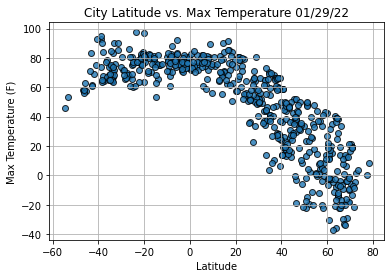

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

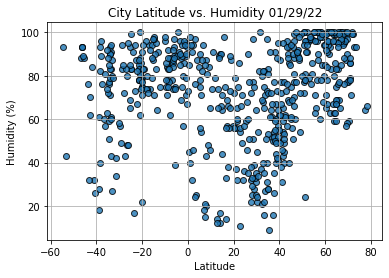

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

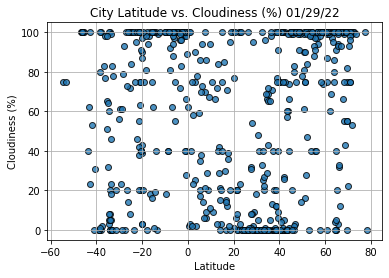

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

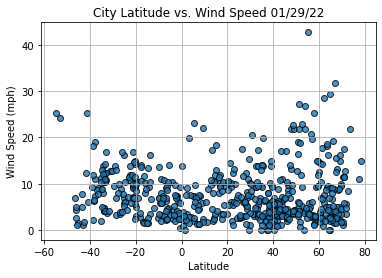

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [64]:
# city_data_df = city_data_df.reset_index

In [17]:
#cityID isn't showing here as in the module, not sure how to make it show
index13 = city_data_df.loc[13]
index13

City                       Omboue
Country                        GA
Date          2022-01-29 20:46:35
Lat                       -1.5746
Lng                        9.2618
Max Temp                     78.6
Humidity                       86
Cloudiness                     98
Wind Speed                   6.15
Name: 13, dtype: object

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Zhanakorgan,KZ,2022-01-29 20:46:31,43.9098,67.2495,25.18,90,60,6.33
5,Fairbanks,US,2022-01-29 20:46:32,64.8378,-147.7164,-14.84,75,0,0.00
7,Portland,US,2022-01-29 20:46:16,45.5234,-122.6762,51.78,56,20,3.00
8,Katsuura,JP,2022-01-29 20:46:33,35.1333,140.3000,41.14,83,43,14.03
9,Jamestown,US,2022-01-29 20:46:33,42.0970,-79.2353,17.10,49,0,5.99


In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

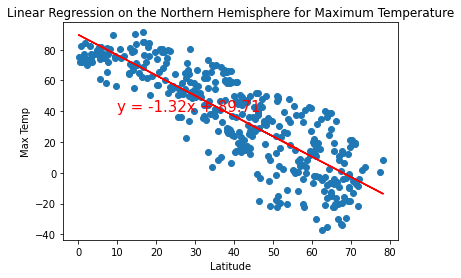

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [45]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.8358165265671808


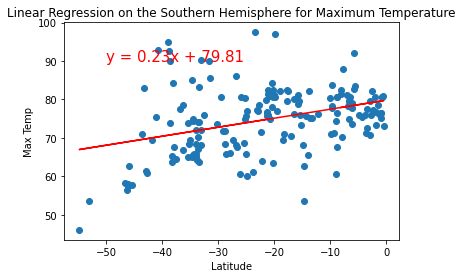

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [47]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.36586159991441536


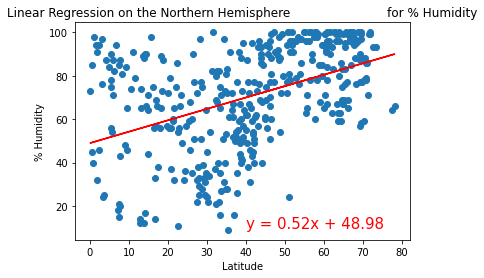

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [54]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.4398347151149885


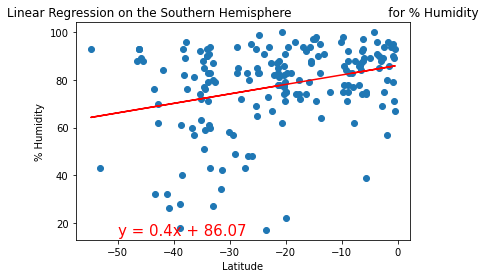

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [51]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.3001715136107284


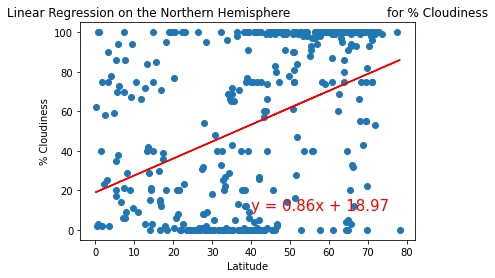

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [60]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.4077522579665472


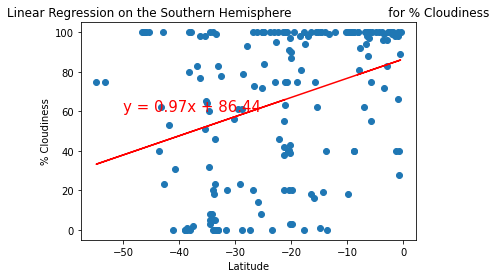

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [62]:
linregress(x_values, y_values)

LinregressResult(slope=0.9707517544290422, intercept=86.44288224251942, rvalue=0.3435360936458597, pvalue=1.925084128123754e-06, stderr=0.19725436351270872, intercept_stderr=4.989909726080297)

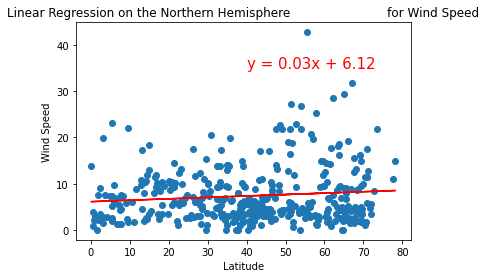

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [80]:
linregress(x_values, y_values)

LinregressResult(slope=0.03074592638307794, intercept=6.115660774547788, rvalue=0.10095284896620929, pvalue=0.04689979754687504, stderr=0.015422363868716779, intercept_stderr=0.6994894220901638)

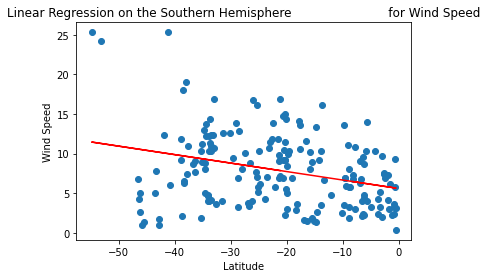

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-90,50))

In [76]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.86x + 18.97


In [82]:
linregress(x_values, y_values)

LinregressResult(slope=-0.10708641192392485, intercept=5.585668922248647, rvalue=-0.30530779380463924, pvalue=2.6385287914698182e-05, stderr=0.024826178154488798, intercept_stderr=0.628023561194906)